In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

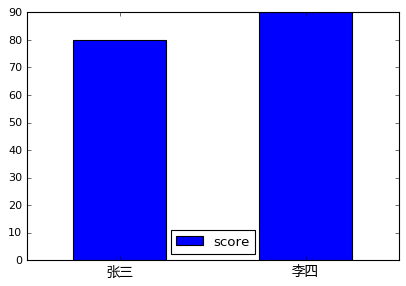

In [3]:
from pandas import DataFrame 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.font_manager import FontProperties 

font = FontProperties(fname="/home/gezi/soft/simsunttc/msyh.ttf", size=12)  #size可不用指定
#font = FontProperties(fname="/home/gezi/soft/simsunttc/simsun.ttc", size=12)  #size可不用指定

# linux 的中文字体 /usr/share/fonts/simhei/simhei.ttf

df = DataFrame({"score":[80, 90]}, index=["张三","李四"]) 
ax = df.plot(kind = 'bar', rot = 0) 
labels = [label.decode("utf-8") for label in df.index.values] 
ax.set_xticklabels(labels, fontproperties=font) 
plt.show()

In [4]:
from IPython.display import Image

In [5]:
import gezi
from libgezi import utf82gbk, gbk2utf8

In [6]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS
 
flags.DEFINE_string('vocab', '/home/gezi/new/temp/image-caption/lijiaoshou/tfrecord/seq-basic/vocab.txt', 'vocabulary file')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.keep100', '')
flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/rnn', '')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.fiximage', '')

#flags.DEFINE_string('vocab', '/home/gezi/new/temp/image-caption/keyword/tfrecord/seq-basic/vocab.txt', 'vocabulary file')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/keyword/model/rnn.lijiaoshou2/', '')

flags.DEFINE_string('seg_method_', 'basic', '')

flags.DEFINE_string('op_name', 'words_importance', 'default is cosine sim importance or encoder_words_importance for maxpooling importance')
#flags.DEFINE_string('op_name', 'encoder_words_importance', 'default is cosine sim importance or encoder_words_importance for maxpooling importance')

import gezi
import melt 
from deepiu.util import text2ids

import numpy as np

text2ids.init(FLAGS.vocab)

predictor = melt.Predictor(FLAGS.model_dir)

def predict(text, text2=None):
  text = utf82gbk(text)
  timer = gezi.Timer()
  text_ids = text2ids.text2ids(text, FLAGS.seg_method_, feed_single=True)
  print('text_ids', text_ids)
    
  #print(tf.get_collection('debug_seqeuence'))
  #x  =  predictor.inference(['debug_seqeuence'], index=0,
  #                                  feed_dict= {
  #                                    'rnn/main/text:0': [text_ids]
  #                                    })

  #print(x)
  #return
    
    
  if text2 is not None:
    text2 = utf82gbk(text2)
    text2_ids = text2ids.text2ids(text2, FLAGS.seg_method_, feed_single=True)
    score = predictor.inference(['textsim'], 
                                    feed_dict= {
                                      'rnn/main/text:0': [text_ids],
                                      'rnn/main/text2:0': [text2_ids]
                                      #'rnn/main/text2:0':[gezi.pad([1], 50)]
                                      })
    print(score[0][0], len(score[0][0]))
    return score[0][0]

  #seq_len = 50	


  #print('words', words)
  argmax_encode = predictor.inference([FLAGS.op_name], 
                                    feed_dict= {
                                      'rnn/main/text:0': [text_ids]
                                      })
  #print('argmax_encode', argmax_encode[0])
  

  argmax_encode = argmax_encode[0][0]
  argmax_encode = [max(x, 0) for x in argmax_encode]

  print('----', len(argmax_encode))

  text_ids =  text2ids.text2ids(text, FLAGS.seg_method_, feed_single=True, append_start=True, append_end=True)
  words = text2ids.ids2words(text_ids)
    
  words = [gbk2utf8(x) for x in words]

  seq_len = 0
  for x in words:
  	if x != 0:
  		seq_len += 1
  	else:
  		break

  print(text_ids)

   # visualize model
  import matplotlib.pyplot as plt
  #argmaxs = [np.sum((argmax_encode==k)) for k in range(seq_len)]
    
  argmaxs = argmax_encode[:seq_len]
  print('argmaxs', argmaxs, np.sum(argmaxs), seq_len)
  x = range(len(argmaxs))
  y = [100.0*n/np.sum(argmaxs) for n in argmaxs]
  #print(words, y)
  print(gbk2utf8(text))
  for word, score in zip(words, y):
    print(word, score)
  fig = plt.figure()
  
  #words = [x.decode('utf8') for x in words]
  #words = [i for i in range(len(words))]

  #plt.xticks(x, words, rotation=45)
  #plt.bar(x, y)
  #plt.ylabel('%')
  #plt.title('Visualisation of words importance')

  df = DataFrame({"%":y}, index=words) 
  ax = df.plot(kind = 'bar', rot = 90) 
  labels = [label.decode("utf-8") for label in df.index.values] 
  ax.set_xticklabels(labels, fontproperties=font) 
    
  #zhfont1 = matplotlib.font_manager.FontProperties(fname='/home/gezi/soft/simsunttc/msyh.ttf')
  #plt.xlabel('性别',fontproperties=zhfont1)
  #plt.ylabel('人数',fontproperties=zhfont1)
  #plt.xticks( (0,1),('男','女') ,fontproperties=zhfont1)
  #plt.bar(left=(0,1), height=(1,0.5), width=0.35)
  
  plt.title('Visualisation of words importance')
  #plt.title('句子词汇重要度')
  plt.show()

tensorflow_version: 1.2.0-rc0
ENCODE_UNK 1
restore from /home/gezi/new/temp/image-caption/lijiaoshou/model/rnn/model.ckpt-48.6-62000


INFO:tensorflow:Restoring parameters from /home/gezi/new/temp/image-caption/lijiaoshou/model/rnn/model.ckpt-48.6-62000


import graph ok /home/gezi/new/temp/image-caption/lijiaoshou/model/rnn/model.ckpt-48.6-62000.meta
restore ok /home/gezi/new/temp/image-caption/lijiaoshou/model/rnn/model.ckpt-48.6-62000


In [7]:
predict('美女', '美女')
predict('帅哥戴墨镜', '帅哥')
predict('帅哥戴墨镜', '墨镜')

text_ids [1311, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[ 1.] 1
text_ids [6829, 1355, 12429, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[ 0.61252904] 1
text_ids [6829, 1355, 12429, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[ 0.71721262] 1


array([ 0.71721262], dtype=float32)

text_ids [1311, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---- 52
[2, 1311, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.32982439, 1.0000002, 0.32156309] 1.65139 3
美女
<S> 19.9725579836
美女 60.555142283
</S> 19.4722943193


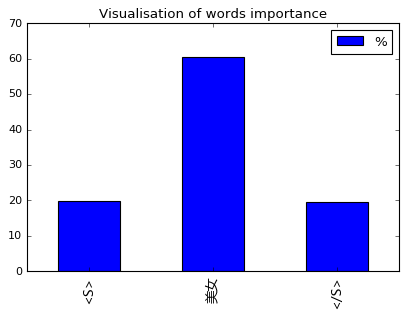

text_ids [6829, 1355, 12429, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---- 52
[2, 6829, 1355, 12429, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.13431609, 0.61252916, 0.82330513, 0.71721274, 0.12248349] 2.40985 5
帅哥戴墨镜
<S> 5.57363650763
帅哥 25.417766125
戴 34.1642139813
墨镜 29.761759657
</S> 5.08262620245


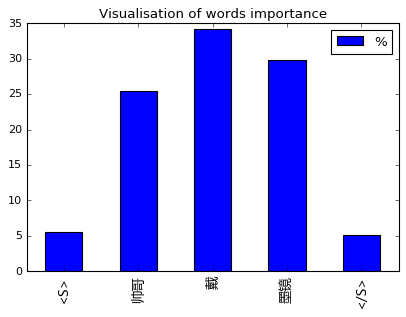

text_ids [3935, 640, 5, 80, 1321, 508, 3, 34, 269, 3, 2239, 25, 3, 1407, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---- 52
[2, 3935, 640, 5, 80, 1321, 508, 3, 34, 269, 3, 2239, 25, 3, 1407, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.18478107, 0.25776312, 0.62489116, 0.12708688, 0.25200754, 0.16659686, 0.48573333, 0.1463856, 0.17556447, 0.41495919, 0.1463856, 0.3763769, 0.23139063, 0.1463856, 0.21616766, 0.15727156] 4.10975 16
初中孩子的免费精品课，用手机，在家上，省心
<S> 4.49616673574
初中 6.27199488813
孩子 15.2051007546
的 3.09232855198
免费 6.13194798001
精品 4.05370117455
课 11.8190569437
， 3.5619126333
用 4.27190459096
手机 10.0969524168
， 3.5619126333
在家 9.1581526365
上 5.63028889641
， 3.5619126333
省心 5.25987760542
</S> 3.82679436402


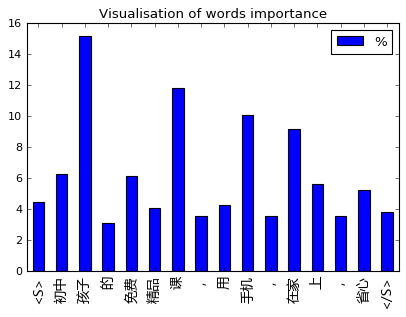

text_ids [17, 34, 1393, 324, 29, 199, 41, 7663, 3, 993, 269, 712, 56, 199, 1362, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---- 52
[2, 17, 34, 1393, 324, 29, 199, 41, 7663, 3, 993, 269, 712, 56, 199, 1362, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.14048168, 0.14300701, 0.30998558, 0.49907154, 0.25005668, 0.22161365, 0.19923207, 0.15589735, 0.41058654, 0.14018631, 0.2678985, 0.5490253, 0.204656, 0.27531934, 0.19923207, 0.046317089, 0.12423114] 4.1368 17
好用颜值高才是王道，这些手机现在买才实惠
<S> 3.39590388167
好 3.45694939677
用 7.49337011817
颜 12.0641991684
值 6.0446918066
高 5.35713009542
才 4.81609390197
是 3.76855124907
王道 9.92522587186
， 3.38876379835
这些 6.47598713111
手机 13.2717456781
现在 4.94720819356
买 6.65537316953
才 4.81609390197
实惠 1.11963626005
</S> 3.00307484652


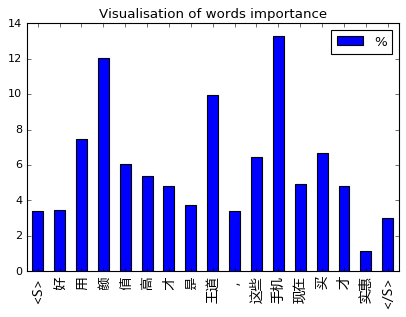

In [8]:
predict('美女')
predict('帅哥戴墨镜')
predict('初中孩子的免费精品课，用手机，在家上，省心')
predict('好用颜值高才是王道，这些手机现在买才实惠')

text_ids [243, 350, 116, 1598, 135, 1401, 6, 18, 1208, 200, 878, 402, 365, 43, 579, 46, 428, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---- 52
[2, 243, 350, 116, 1598, 135, 1401, 6, 18, 1208, 200, 878, 402, 365, 43, 579, 46, 428, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.030073272, 0.048953284, 0.51125628, 0.44911033, 0.3856056, 0, 0.23178267, 0.033524089, 0.018463071, 0.53527439, 0.28780764, 0.10936284, 0.34289342, 0.06188342, 0.0050789677, 0.073054865, 0.029865541, 0.55924749, 0.018642776] 3.73187995516 19
比信用卡分期更划算！有身份证就能申请10-30万贷款
<S> 0.805847787863
比 1.3117593322
信用 13.6996978387
卡 12.0344259341
分期 10.3327440349
更 0.0
划算 6.21088238568
！ 0.898316370418
有 0.494739157142
身份 14.3432905891
证 7.71213562258
就能 2.9305026412
申请 9.18822217676
10 1.65823714845
- 0.136096758784
30 1.95758882602
万 0.80028138426
贷款 14.9856774726
</S> 0.499554539224


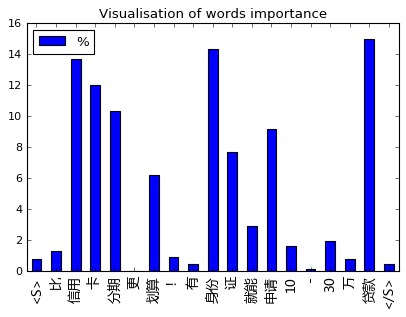

text_ids [4, 16, 4957, 820, 16428, 133, 101, 41, 272, 9, 7, 59, 2368, 15, 341, 56, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---- 52
[2, 4, 16, 4957, 820, 16428, 133, 101, 41, 272, 9, 7, 59, 2368, 15, 341, 56, 20, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.18017662, 0.20994207, 0.23334837, 0.61757505, 0.34721237, 0.43434772, 0.16988568, 0.1843653, 0.20141104, 0.23577054, 0.15881756, 0.14675255, 0.18887734, 0.091951683, 0.15527073, 0.18497488, 0.13645551, 0.1616607, 0.15469182] 4.19349 19
1890元往返飞旧金山?真是赚了,我一直在这里买!
<S> 4.29658153314
<NUM> 5.00638347941
元 5.56454172272
往返 14.7270029579
飞 8.27979962433
旧金山 10.3576725582
? 4.05117874413
真 4.39646704526
是 4.80294818362
赚 5.62230197043
了 3.78724281447
, 3.4995346034
我 4.50406344688
一直 2.19272574443
在 3.70266324031
这里 4.41100331564
买 3.25398612478
! 3.85504178748
</S> 3.68885826075


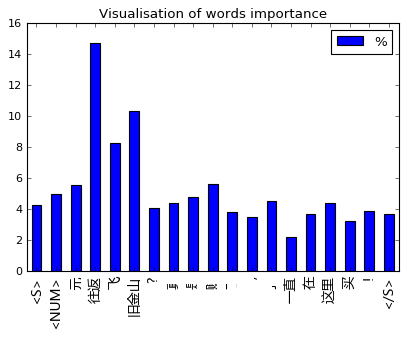

text_ids [14, 199, 41, 976, 620, 100, 844, 5, 3709, 4480, 2260, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---- 52
[2, 14, 199, 41, 976, 620, 100, 844, 5, 3709, 4480, 2260, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.060265768, 0.10904163, 0.13206792, 0.061764214, 0.26569927, 0.17311433, 0.25281835, 0.749807, 0.10289322, 0.19773963, 0.19188705, 0.13143256, 0.081005223, 0.058150537] 2.56769 14
这才是上班族修本科的正确打开方式！
<S> 2.34708409175
这 4.24668738351
才 5.14345904545
是 2.40544190512
上班 10.3478067411
族 6.7420344971
修 9.84615204623
本科 29.20165346
的 4.00723400342
正确 7.70108064703
打开 7.47314863915
方式 5.11871476154
！ 3.15479377063
</S> 2.26470523579


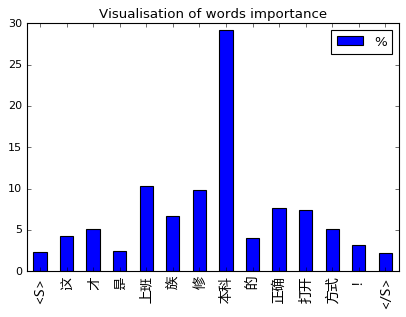

In [9]:
predict('比信用卡分期更划算！有身份证就能申请10-30万贷款')
predict('1890元往返飞旧金山?真是赚了,我一直在这里买!')
predict('这才是上班族修本科的正确打开方式！')

text_ids [19589, 36, 737, 8, 74, 626, 852, 245, 7, 993, 5404, 340, 12, 9771, 12322, 6140, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---- 52
[2, 19589, 36, 737, 8, 74, 626, 852, 245, 7, 993, 5404, 340, 12, 9771, 12322, 6140, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.1100675, 0.28583848, 0.09931273, 0.064172491, 0.089494698, 0.12327203, 0.52315921, 0.55728006, 0.069546558, 0.081777215, 0.16301745, 0.61007333, 0.24576269, 0.096417651, 0.39655873, 0.29988927, 0.50873107, 0.090499468] 4.41487 18
国庆到成都不要住酒店啦,这些民宿带你领略别样风情
<S> 2.49310840701
国庆 6.47444812172
到 2.2495050644
成都 1.45355327837
不 2.02711954
要 2.79220054557
住 11.8499338565
酒店 12.6227959269
啦 1.57527976664
, 1.852312982
这些 3.69246301892
民宿 13.8186014943
带 5.56670244671
你 2.1839294216
领略 8.98234168271
别样 6.79270847577
风情 11.5231260937
</S> 2.0498783152


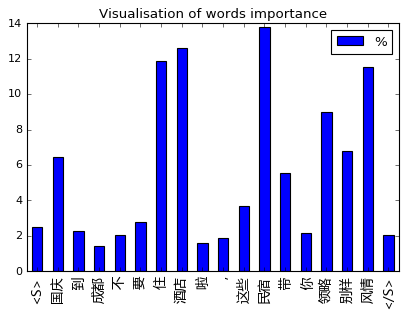

text_ids [8145, 39, 269, 133, 8, 256, 8145, 33, 478, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---- 52
[2, 8145, 39, 269, 133, 8, 256, 8145, 33, 478, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.11925551, 0.21897888, 0.28538406, 0.40626466, 0.11665973, 0.10494984, 0.12267599, 0.21897888, 0.44994599, 0.67198563, 0.11122056] 2.8263 11
低头玩手机?不如低头学英语
<S> 4.21949287013
低头 7.74790035059
玩 10.0974451594
手机 14.374436916
? 4.12764902534
不 3.71333021142
如 4.3405158524
低头 7.74790035059
学 15.9199674213
英语 23.7761633694
</S> 3.93520058232


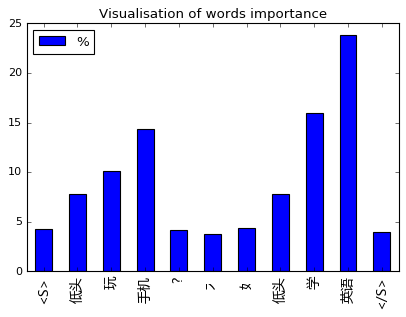

text_ids [6829, 6, 1277, 2671, 15, 59, 341, 2532, 87, 18, 400, 529, 6, 49, 378, 78, 58, 172, 21, 3697, 5718, 542, 18, 1262, 2511, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---- 52
[2, 6829, 6, 1277, 2671, 15, 59, 341, 2532, 87, 18, 400, 529, 6, 49, 378, 78, 58, 172, 21, 3697, 5718, 542, 18, 1262, 2511, 12, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.024330027, 0.27852109, 0.064721599, 0.15629473, 0.68816173, 0.081245519, 0.0012301486, 0.078506052, 0.28940958, 0.030702453, 0.04079853, 0.030930419, 0.030351102, 0.064721599, 0.13707043, 0.07734403, 0.1382345, 0.064934067, 0.083196186, 0.054923542, 0.22323442, 0.25322038, 0.097436622, 0.04079853, 0.23000386, 0.077961393, 0.022021126, 0.022744656] 3.38305 28
帅哥！世界名表在我这里并没有这么贵！加微信送3年保修里面总有一款属于你
<S> 0.719174699055
帅哥 8.23284406189
！ 1.9131148467
世界 4.61993798527
名表 20.341469307
在 2.40154772007
我 0.0363621352972
这里 2.32057143812
并 8.55469838225
没 0.90753812599
有 1.2059694811

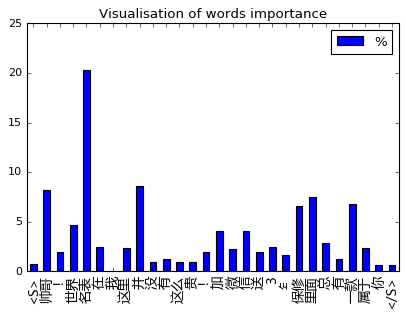

text_ids [2520, 1741, 11, 218, 11, 478, 2583, 885, 508, 7, 136, 640, 3755, 279, 25, 478, 20, 4884, 16, 1777, 508, 80, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---- 52
[2, 2520, 1741, 11, 218, 11, 478, 2583, 885, 508, 7, 136, 640, 3755, 279, 25, 478, 20, 4884, 16, 1777, 508, 80, 865, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.090867251, 0.30626696, 0.69621885, 0.075825453, 0.12325439, 0.075825453, 0.7006439, 0.2653701, 0.06856738, 0.44536269, 0.083271518, 0.12329825, 0.5175904, 0.099320918, 0.20039751, 0.12257478, 0.7006439, 0.097713813, 0, 0.16319773, 0.35617709, 0.44536269, 0.15034509, 0.1436168, 0.070084348] 6.12179724127 25
精彩外教一对一英语主题活动课,让孩子从此爱上英语!288元试听课免费领取
<S> 1.48432310932
精彩 5.00289296446
外教 11.3727851608
一 1.23861424703
对 2.01336933768
一 1.23861424703
英语 11.4450686529
主题 4.33483975829
活动 1.1200531087
课 7.27503165424
, 1.3602462654
让 2.01408581956
孩子 8.45487661805
从此 1.62241437289
爱 3.27

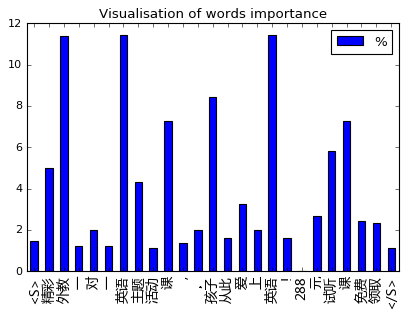

In [10]:
predict('国庆到成都不要住酒店啦,这些民宿带你领略别样风情')
predict('低头玩手机?不如低头学英语')
predict('帅哥！世界名表在我这里并没有这么贵！加微信送3年保修里面总有一款属于你')
predict('精彩外教一对一英语主题活动课,让孩子从此爱上英语!288元试听课免费领取')

text_ids [2280, 4880, 33, 90, 1294, 133, 33, 2193, 328, 942, 7, 612, 36, 163, 27, 8, 978, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---- 52
[2, 2280, 4880, 33, 90, 1294, 133, 33, 2193, 328, 942, 7, 612, 36, 163, 27, 8, 978, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.11897777, 0.55106789, 0.17089319, 0.48506895, 0.095759138, 0.22056109, 0.11412814, 0.48506895, 0.68620002, 0.38349423, 0.23532802, 0.097280234, 0.16739668, 0.067196965, 0.1637598, 0.10466921, 0.095895596, 0, 0.14486164, 0.10443433] 4.4920418337 20
打工回来学点啥?学厨师当老板,走到哪都不怕！
<S> 2.64863450996
打工 12.2676481907
回来 3.8043544254
学 10.7984067165
点 2.13175081645
啥 4.91004080765
? 2.54067391556
学 10.7984067165
厨师 15.2759045463
当 8.53719182327
老板 5.23877620417
, 2.16561282597
走 3.72651648666
到 1.49591138519
哪 3.64555371197
都 2.33010326195
不 2.13478857497
怕 0.0
！ 3.22485061157
</S> 2.32487446929


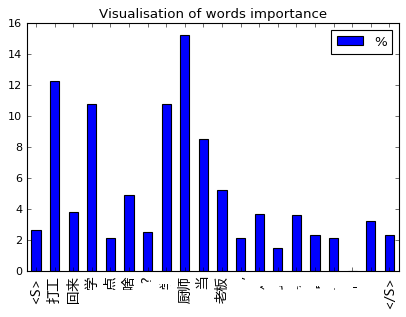

text_ids [4214, 72, 7, 84, 168, 2193, 7, 1375, 990, 290, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---- 52
[2, 4214, 72, 7, 84, 168, 2193, 7, 1375, 990, 290, 20, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.060753994, 0.61955714, 0.38051993, 0.058775462, 0.067297265, 0.093551219, 0.71281826, 0.058775462, 0.25160986, 0.27425009, 0.29517043, 0.096059702, 0.050698414] 3.01984 13
水饺加盟,无需厨师,总部扶持创业!
<S> 2.01183013694
水饺 20.5162435364
加盟 12.6006770821
, 1.94631231637
无 2.22850643232
需 3.0978895265
厨师 23.6045267235
, 1.94631231637
总部 8.33190169203
扶持 9.0816185547
创业 9.77438227902
! 3.18095638442
</S> 1.67884598


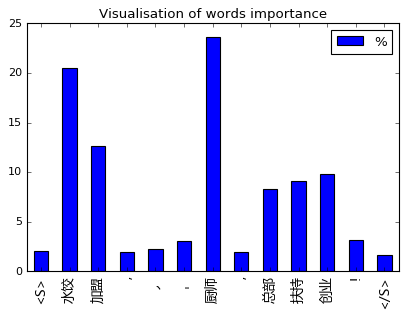

text_ids [4214, 72, 7, 84, 168, 2193, 7, 1375, 990, 290, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---- 52
[2, 4214, 72, 7, 84, 168, 2193, 7, 1375, 990, 290, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.071797699, 0.62384593, 0.38384256, 0.067480542, 0.08131595, 0.10658503, 0.72860205, 0.067480542, 0.26132667, 0.29972017, 0.31382293, 0.063547395] 3.06937 12
水饺加盟,无需厨师,总部扶持创业
<S> 2.3391692546
水饺 20.3249025545
加盟 12.5055917573
, 2.19851626668
无 2.64927389687
需 3.47254048125
厨师 23.7378571773
, 2.19851626668
总部 8.51402376599
扶持 9.76488403633
创业 10.2243519038
</S> 2.070374338


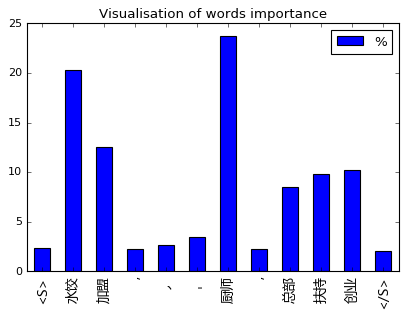

In [11]:
predict('打工回来学点啥?学厨师当老板,走到哪都不怕！')
predict('水饺加盟,无需厨师,总部扶持创业!')
predict('水饺加盟,无需厨师,总部扶持创业')

text_ids [1434, 4062, 1992, 303, 29, 695, 115, 52, 676, 38, 1386, 9, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---- 52
[2, 1434, 4062, 1992, 303, 29, 695, 115, 52, 676, 38, 1386, 9, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.09716063, 0.71265781, 0.53801394, 0.46930739, 0.15373495, 0.11063844, 0.33219901, 0.096346214, 0.24390796, 0.12233178, 0.16934133, 0.41964185, 0.087462321, 0.12017994, 0.098851912] 3.77178 15
iPhone隐藏功能：高铁也能在线选座了！
<S> 2.57599170991
iphone 18.8944905978
隐藏 14.2642080196
功能 12.4426113153
： 4.07593037131
高 2.93332498524
铁 8.80749630183
也 2.55439934667
能 6.46666122839
在线 3.24334722358
选 4.48969764426
座 11.1258431904
了 2.31886324529
！ 3.1862959288
</S> 2.62083217551


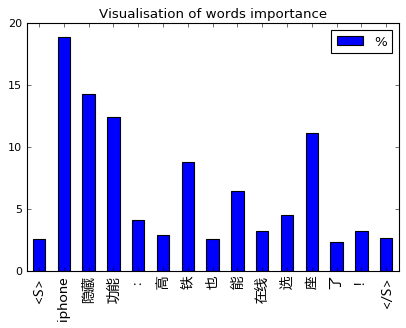

In [12]:
predict('iPhone隐藏功能：高铁也能在线选座了！')

In [13]:
predict('iPhone隐藏功能：高铁也能在线选座了！', 'iPhone')

text_ids [1434, 4062, 1992, 303, 29, 695, 115, 52, 676, 38, 1386, 9, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[ 0.71265781] 1


array([ 0.71265781], dtype=float32)

In [14]:
predict('iPhone隐藏功能：高铁也能在线选座了！', '高铁')

text_ids [1434, 4062, 1992, 303, 29, 695, 115, 52, 676, 38, 1386, 9, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[ 0.33175933] 1


array([ 0.33175933], dtype=float32)

In [15]:
predict('iPhone隐藏功能：高铁也能在线选座了！', '高铁选座')

text_ids [1434, 4062, 1992, 303, 29, 695, 115, 52, 676, 38, 1386, 9, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[ 0.49608862] 1


array([ 0.49608862], dtype=float32)

text_ids [4447, 7542, 9634, 2835, 8124, 7, 9771, 3086, 5, 3612, 7, 136, 7808, 3254, 25, 2835, 5341, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---- 52
[2, 4447, 7542, 9634, 2835, 8124, 7, 9771, 3086, 5, 3612, 7, 136, 7808, 3254, 25, 2835, 5341, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.1102868, 0.29534161, 0.45371884, 0.4302296, 0.69001883, 0.37288418, 0.0700287, 0.35695335, 0.10472051, 0.1046648, 0.28227568, 0.0700287, 0.19537678, 0.41480452, 0.2137894, 0.10280336, 0.69001883, 0.31157798, 0.085541636] 5.35506 19
携手欧歌步入音乐殿堂,领略ta的神奇,让心灵插上音乐翅膀
<S> 2.05948619473
携手 5.51518367628
欧歌 8.47270636273
步入 8.03407038745
音乐 12.885351951
殿堂 6.96320697611
, 1.30770988064
领略 6.66571600897
ta 1.95554174889
的 1.95450132355
神奇 5.27119155242
, 1.30770988064
让 3.64844914461
心灵 7.74602366633
插 3.99228481344
上 1.91974098858
音乐 12.885351951
翅膀 5.81838014785
</S> 1.59739710124


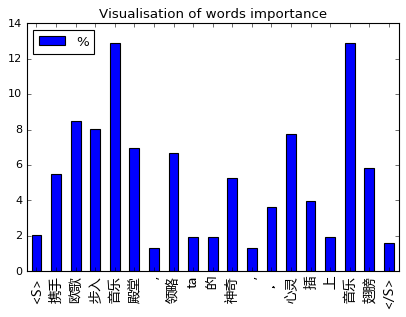

In [16]:
predict('携手欧歌步入音乐殿堂,领略ta的神奇,让心灵插上音乐翅膀')

text_ids [949, 1009, 852, 253, 7, 1761, 3744, 131, 7, 763, 728, 30, 10, 1397, 94, 5, 407, 1646, 68, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---- 52
[2, 949, 1009, 852, 253, 7, 1761, 3744, 131, 7, 763, 728, 30, 10, 1397, 94, 5, 407, 1646, 68, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.084165126, 0.35074469, 0.43786213, 0.58638656, 0.13366184, 0.069873378, 0.37710166, 0.36098415, 0.2509636, 0.069873378, 0.14367372, 0.20433991, 0.0620903, 0.077434838, 0.099647745, 0.048834823, 0.077537373, 0.10423712, 0.26744884, 0.096431926, 0.0723757] 3.97567 21
底价预订酒店服务,交通便利设,施齐全 欢迎您的光临.
<S> 2.11700541596
底价 8.8222812981
预订 11.0135461037
酒店 14.7493811755
服务 3.36199616987
, 1.75752506842
交通 9.48523804623
便利 9.07983423731
设 6.31248739143
, 1.75752506842
施 3.61382502745
齐 5.13976166891
全 1.56175731615
  1.94771847521
欢迎 2.50643974176
您 1.22834230446
的 1.9502975353
光 2.62187638754
临 6.72714073457


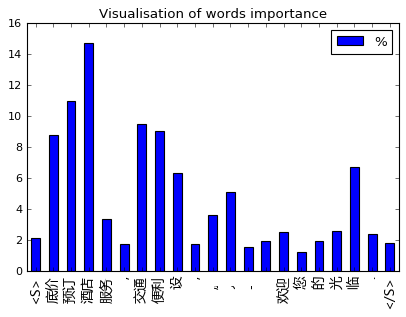

In [17]:
predict('底价预订酒店服务,交通便利设,施齐全 欢迎您的光临.')

text_ids [8854, 2277, 583, 3581, 852, 197, 7, 11, 218, 11, 2277, 197, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---- 52
[2, 8854, 2277, 583, 3581, 852, 197, 7, 11, 218, 11, 2277, 197, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.064807296, 0.57757962, 0.82906669, 0.28744954, 0.29666904, 0.41175631, 0.11547834, 0.041651342, 0.050110765, 0.015663868, 0.050110765, 0.82906669, 0.11547834, 0.054569136] 3.73946 14
巨人游泳五星级酒店培训,一对一游泳培训
<S> 1.73306651236
巨人 15.4455432982
游泳 22.1707711421
五 7.68693035842
星级 7.93347670912
酒店 11.011122404
培训 3.08810352232
, 1.11383363919
一 1.34005419166
对 0.418880689769
一 1.34005419166
游泳 22.1707711421
培训 3.08810352232
</S> 1.4592792625


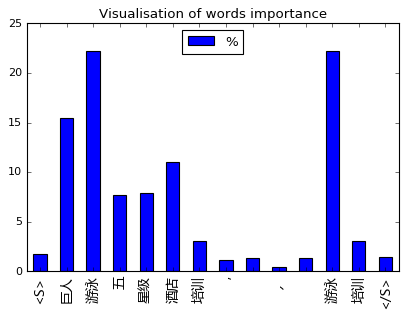

In [18]:
predict('巨人游泳五星级酒店培训,一对一游泳培训')

text_ids [1216, 2016, 27, 136, 640, 32, 881, 7345, 33, 478, 44, 640, 3811, 3065, 2812, 252, 478, 3, 912, 579, 57, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---- 52
[2, 1216, 2016, 27, 136, 640, 32, 881, 7345, 33, 478, 44, 640, 3811, 3065, 2812, 252, 478, 3, 912, 579, 57, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.13863614, 0.11695194, 0.40750024, 0.12614799, 0.20380941, 0.59717983, 0.1059036, 0.22499207, 0.37633967, 0.33373696, 0.7286489, 0.14263019, 0.59717983, 0.35028809, 0.48041931, 0.43617001, 0.22026619, 0.7286489, 0.11369237, 0.28840452, 0.11469149, 0.052783675, 0.15709209, 0.12661205] 7.16873 24
为什么妈妈都让孩子来vipjr学英语？孩子大胆开口流利说英语，只要30天！
<S> 1.93390222848
为什么 1.63141889863
妈妈 5.68441681527
都 1.7596989259
让 2.84303549636
孩子 8.33034869113
来 1.47730019548
vip 3.13852255771
jr 5.24974313064
学 4.65545732723
英语 10.1642739974
？ 1.98961712015
孩子 8.33034869113
大胆 4.88633709787
开口 6.70160000657
流利 

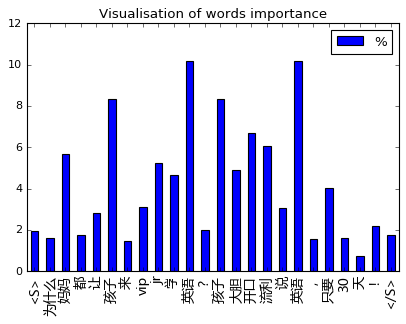

In [19]:
predict('为什么妈妈都让孩子来vipjr学英语？孩子大胆开口流利说英语，只要30天！')

text_ids [4957, 820, 16428, 133, 101, 41, 272, 9, 7, 59, 2368, 15, 341, 56, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---- 52
[2, 4957, 820, 16428, 133, 101, 41, 272, 9, 7, 59, 2368, 15, 341, 56, 20, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.19366413, 0.63994026, 0.38439947, 0.4974598, 0.19542634, 0.21789175, 0.21197641, 0.2889162, 0.17425425, 0.16754067, 0.19720548, 0.11123779, 0.16099305, 0.22273353, 0.13262334, 0.18202287, 0.16963622] 4.14792 17
往返飞旧金山?真是赚了,我一直在这里买!
<S> 4.66894396736
往返 15.4279740406
飞 9.2672792362
旧金山 11.9929895393
? 4.71142816809
真 5.25303454882
是 5.11042472188
赚 6.96532458648
了 4.20100165574
, 4.03914748457
我 4.75432047006
一直 2.68177188245
在 3.88129457356
这里 5.36976227931
买 3.19734456574
! 4.38829102377
</S> 4.08966797458


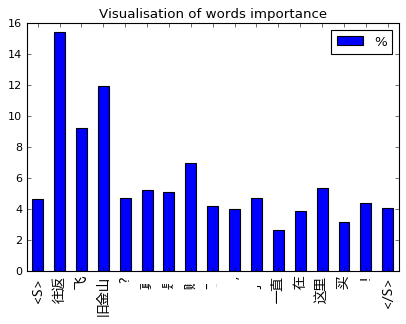

In [20]:
predict('往返飞旧金山?真是赚了,我一直在这里买!')

text_ids [8, 74, 626, 852, 3, 341, 5, 5404, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---- 52
[2, 8, 74, 626, 852, 3, 341, 5, 5404, 17, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.22631983, 0.22330961, 0.24605446, 0.7361443, 0.64613044, 0.21528755, 0.24470454, 0.23392664, 0.79885316, 0.24632287, 0.21103774] 4.02809 11
不要住酒店，这里的民宿好
<S> 5.61853767437
不 5.54380679182
要 6.10846252806
住 18.2752630358
酒店 16.0406101436
， 5.34465403752
这里 6.0749501037
的 5.80738155991
民宿 19.8320513003
好 6.11512609618
</S> 5.23914970015


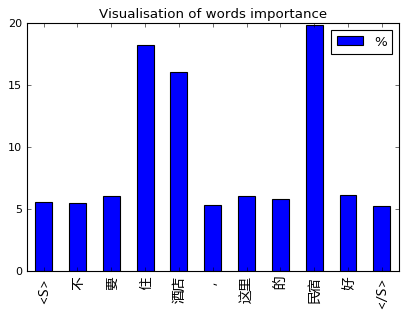

In [21]:
predict('不要住酒店，这里的民宿好')

text_ids [8, 74, 626, 5404, 3, 341, 5, 852, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---- 52
[2, 8, 74, 626, 5404, 3, 341, 5, 852, 17, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.20084786, 0.20079324, 0.23611739, 0.78222895, 0.8702395, 0.19280548, 0.22939682, 0.20678914, 0.51501626, 0.21242213, 0.18853396] 3.83519 11
不要住民宿，这里的酒店好
<S> 5.236971602
不 5.23554722296
要 6.1566005989
住 20.3960883397
民宿 22.6909036248
， 5.02727200191
这里 5.98136623143
的 5.39188622722
酒店 13.4286990199
好 5.53876278545
</S> 4.91589496354


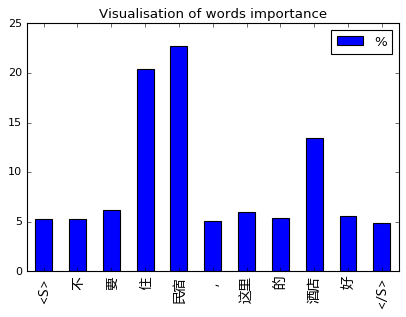

In [22]:
predict('不要住民宿，这里的酒店好')

text_ids [247, 189, 4845, 2881, 12429, 3, 417, 52, 175, 9, 401, 3, 1072, 174, 23, 6114, 556, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---- 52
[2, 247, 189, 4845, 2881, 12429, 3, 417, 52, 175, 9, 401, 3, 1072, 174, 23, 6114, 556, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.021187235, 0.27885735, 0.14634758, 0.54630291, 0.30086809, 0.47918129, 0.034715332, 0.079827517, 0.092278123, 0.12814198, 0.018892834, 0.23171416, 0.034715332, 0.30146685, 0.13414705, 0.044516563, 0.28081948, 0.059161086, 0.018892834, 0.020432336] 3.25247 20
男神开车专用墨镜，怎么能少了它，降价后就快抢完了
<S> 0.651420642324
男 8.57372078572
神 4.49958843501
开车 16.7965759142
专用 9.25046095352
墨镜 14.7328610067
， 1.06735420084
怎么 2.45436902862
能 2.83717413007
少 3.93984090186
了 0.580877222878
它 7.12426084886
， 1.06735420084
降价 9.26887032247
后 4.12447200086
就 1.36870189933
快抢 8.63404809809
完 1.81896094538
了 0.580877222878
</S> 0.

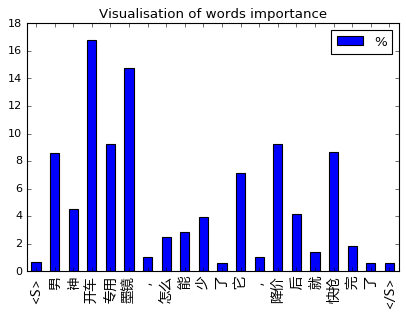

In [23]:
predict('男神开车专用墨镜，怎么能少了它，降价后就快抢完了')

text_ids [59, 5, 22092, 5705, 3781, 914, 326, 3, 38, 1262, 1553, 5, 12429, 343, 1826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---- 52
[2, 59, 5, 22092, 5705, 3781, 914, 326, 3, 38, 1262, 1553, 5, 12429, 343, 1826, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.028229885, 0.0027119266, 0.078704044, 0.39605802, 0.55904114, 0.39474699, 0.23440544, 0.15734531, 0.017532304, 0.087391637, 0.27889532, 0, 0.078704044, 0.55763674, 0.1523581, 0.089665584, 0.014340566] 3.12776705436 17
我的家乡惠州越来越热，选一款喜欢的墨镜很重要
<S> 0.902557137812
我 0.0867048773067
的 2.5163013375
家乡 12.662644503
惠州 17.8734903446
越来 12.6207285309
越 7.49433826107
热 5.03059553729
， 0.560537393757
选 2.79405837285
一款 8.91675478578
喜欢 0.0
的 2.5163013375
墨镜 17.8285891542
很 4.87114600193
重要 2.8667603024
</S> 0.458492122036


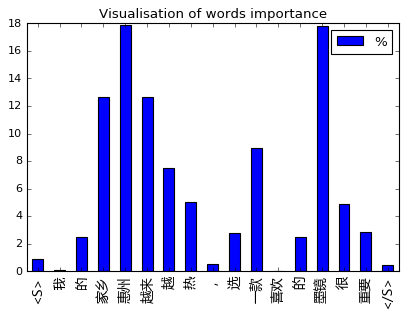

In [24]:
predict('我的家乡惠州越来越热，选一款喜欢的墨镜很重要')

text_ids [59, 5, 22092, 3781, 914, 326, 3, 38, 1262, 1553, 5, 12429, 343, 1826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---- 52
[2, 59, 5, 22092, 3781, 914, 326, 3, 38, 1262, 1553, 5, 12429, 343, 1826, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.068720609, 0.04341197, 0.10305693, 0.48326114, 0.39561033, 0.25857276, 0.25724566, 0.058685768, 0.09925808, 0.31733125, 0.039677978, 0.10305693, 0.56446028, 0.20063716, 0.17663088, 0.048196577] 3.21781 16
我的家乡越来越热，选一款喜欢的墨镜很重要
<S> 2.1356299474
我 1.34911353261
的 3.20269958853
家乡 15.0183034599
越来 12.2943799026
越 8.0356640081
热 7.99442180976
， 1.82377726838
选 3.08464275384
一款 9.86170147028
喜欢 1.23307226796
的 3.20269958853
墨镜 17.541728621
很 6.23519985786
重要 5.48915692315
</S> 1.49780471659


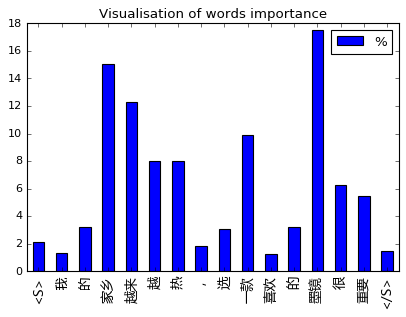

In [25]:
predict('我的家乡越来越热，选一款喜欢的墨镜很重要')

text_ids [38, 1262, 1553, 5, 12429, 343, 1826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---- 52
[2, 38, 1262, 1553, 5, 12429, 343, 1826, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.16998434, 0.20524774, 0.44361705, 0.257465, 0.20337534, 0.54850096, 0.38951105, 0.3479116, 0.15899768] 2.72461 9
选一款喜欢的墨镜很重要
<S> 6.23884796498
选 7.53310258266
一款 16.2818486282
喜欢 9.44960586189
的 7.46438064843
墨镜 20.1313488884
很 14.2960240017
重要 12.769220659
</S> 5.8356103735


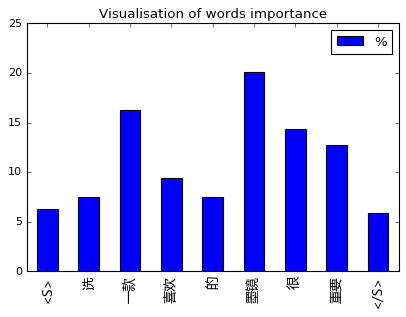

In [26]:
predict('选一款喜欢的墨镜很重要')

text_ids [10182, 3404, 3199, 1798, 12022, 1744, 1456, 4075, 605, 554, 10, 645, 1246, 370, 5063, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---- 52
[2, 10182, 3404, 3199, 1798, 12022, 1744, 1456, 4075, 605, 554, 10, 645, 1246, 370, 5063, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.019385356, 0.098927081, 0.21509728, 0.30233085, 0.15460619, 0.088704437, 0.064312436, 0.17550352, 0.065233327, 0.083732001, 0.22071791, 0, 0.055227183, 0.10578753, 0.25686407, 0.37740892, 0.0067447871] 2.2905828841 17
asics助力#{地域}鸟巢半马 推限量版跑鞋
<S> 0.846306701695
asics 4.3188605537
助力 9.39050404372
# 13.1988610259
{ 6.74964413543
地域 3.87257049867
} 2.80768865134
鸟 7.66195903129
巢 2.84789203225
半 3.65548883057
马 9.63588388282
  0.0
推 2.41105367498
限量 4.6183672844
版 11.2139173254
跑鞋 16.4765450898
</S> 0.294457238102


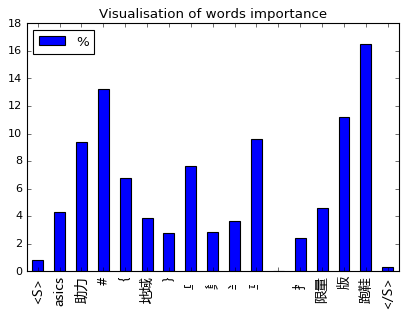

In [27]:
predict('asics助力#{地域}鸟巢半马 推限量版跑鞋')

text_ids [365, 196, 7327, 7, 609, 57, 7231, 7, 18, 2039, 1153, 7, 1352, 4393, 7, 566, 5411, 7, 1397, 2289, 561, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---- 52
[2, 365, 196, 7327, 7, 609, 57, 7231, 7, 18, 2039, 1153, 7, 1352, 4393, 7, 566, 5411, 7, 1397, 2289, 561, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.17830551, 0.29107934, 0.41771543, 0.67324615, 0.17425719, 0.17491049, 0.19387744, 0.54593277, 0.17425719, 0.14772534, 0.28690672, 0.34611309, 0.17425719, 0.42243057, 0.65150988, 0.17425719, 0.28767174, 0.3154355, 0.17425719, 0.18378994, 0.26456779, 0.30865592, 0.16127241] 6.72243 23
10套起订,7天到货,有现货供应,精选面料,质量上乘,欢迎电话咨询
<S> 2.65239597414
10 4.32997101496
套 6.21375495364
起订 10.0149198881
, 2.59217494289
7 2.60189310355
天 2.88403740619
到货 8.12106091087
, 2.59217494289
有 2.19749863119
现货 4.26790086879
供应 5.14862929469
, 2.59217494289
精选 6.2838954158
面料 9.69158057679
, 2.59217494289
质量 4.27928

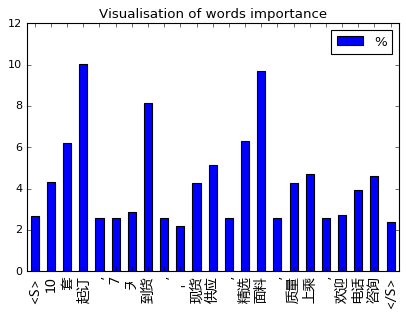

In [28]:
predict('10套起订,7天到货,有现货供应,精选面料,质量上乘,欢迎电话咨询')

text_ids [482, 6, 836, 2225, 16242, 4155, 850, 34, 628, 142, 6753, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---- 52
[2, 482, 6, 836, 2225, 16242, 4155, 850, 34, 628, 142, 6753, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0, 0.0097292252, 0, 0.46444514, 0.28628635, 0.29704413, 0.85104108, 0, 0.0063367952, 0.21831916, 0.049651347, 0.38166133, 0, 0] 2.56451456062 14
牛！亲闺密语内衣竟然用她做模特！
<S> 0.0
牛 0.379378824276
！ 0.0
亲 18.1104506509
闺 11.1633740927
密语 11.5828598808
内衣 33.1852699
竟然 0.0
用 0.24709530854
她 8.51307947627
做 1.93609144838
模特 14.8824004181
！ 0.0
</S> 0.0


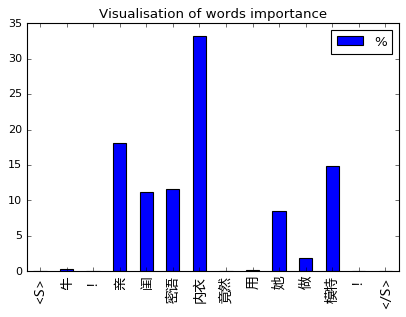

In [29]:
predict('牛！亲闺密语内衣竟然用她做模特！')

In [30]:
predict('室内净化生意火爆，除甲醛加盟，让你赚大钱！')

text_ids [1469, 1610, 832, 666, 3, 691, 1630, 72, 3, 136, 12, 272, 3047, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---- 52
[2, 1469, 1610, 832, 666, 3, 691, 1630, 72, 3, 136, 12, 272, 3047, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.13636076, 0.60711586, 0.62381601, 0.40737861, 0.14708087, 0.13222274, 0.32068425, 0.66534537, 0.35054004, 0.13222274, 0.14658535, 0.14127296, 0.30106205, 0.38086298, 0.13392821, 0.1241933] 4.75067 16
室内净化生意火爆，除甲醛加盟，让你赚大钱！
<S> 2.87034665271
室内 12.7795777366
净化 13.1311100543
生意 8.57517809606
火爆 3.09600111193
， 2.78324271531
除 6.75029198379
甲醛 14.0052885802
加盟 7.37874592914
， 2.78324271531
让 3.08557052066
你 2.97374670301
赚

ValueError: I/O operation on closed file

In [ ]:
predict('25年西服定制经验，一套起订，免费上门量身，15天交货免费送货！')

In [ ]:
predict('时尚日记--我的欧美女装买手电商,七天包邮退换')

In [ ]:
predict('素颜胜带妆,护肤哪家强?[您的品牌]正品特卖')

In [ ]:
predict('口碑美妆国货照样让你肌肤水当当,圣诞礼盒特卖低至1折起!')

In [ ]:
predict('找房费时费力？来中原网，海量二手房/租房信息平台，满足追求高品质的您！')

In [ ]:
predict('【装修福利】国际大师为您免费设计家,免费测量出图,仅限100席！')

In [ ]:
predict('专业电视机维修,让它三生三世都陪你!')